# Explore Google AutoML NLP

In [26]:
from pathlib import Path
from IPython import display
import os, io
from google.cloud import language

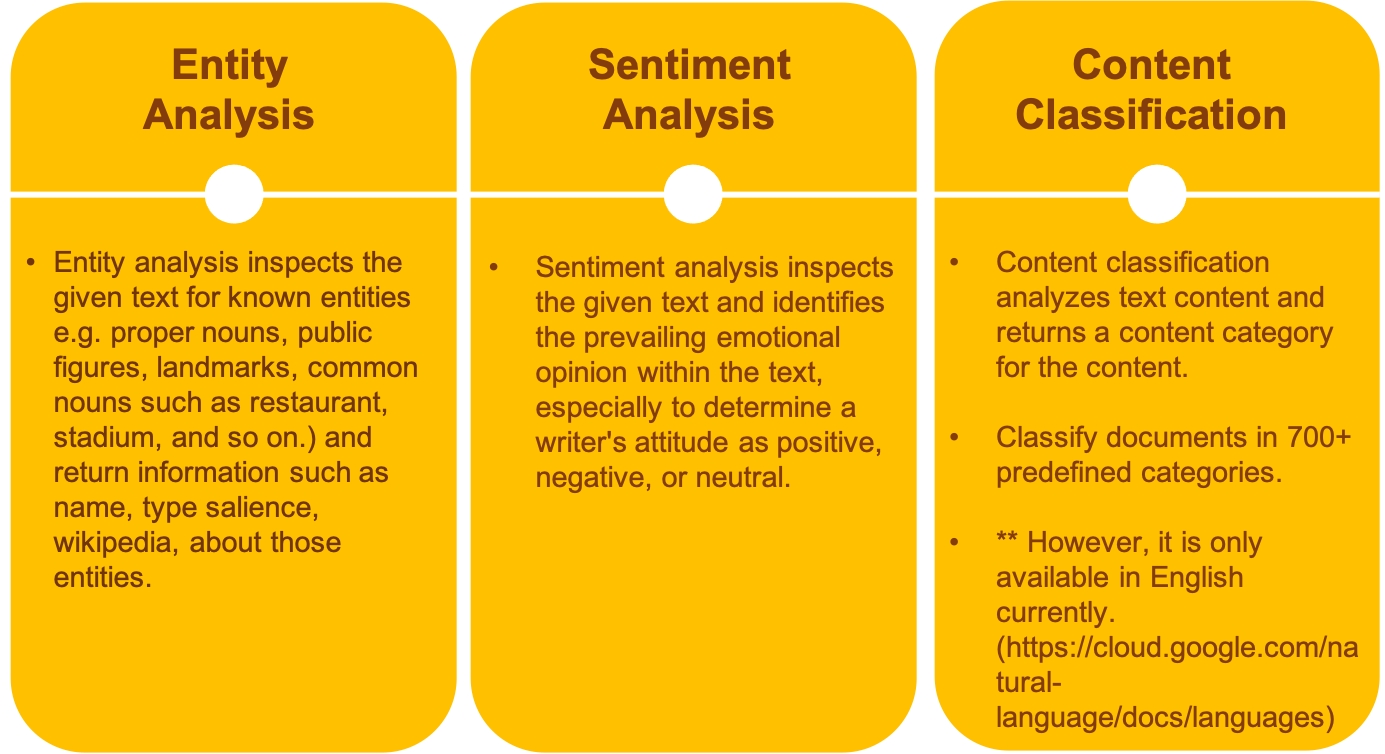

In [21]:
display.Image("/Users/michliu/Documents/HSBC - Data scientist/image/Google NLP API.png", width = 800, height = 300)

Tracking and analysing call centre records and data can help to improve customer service and agent performance. It can provide insights of the areas of strength and weakness to improve the service and customer satisfaction. 

With entity analysis, we can first understand the context of the call, is the customer calling about the problem on internet banking, or they want to open a new credit card, or if they see weird transaction in their bank account. Inspecting the entities in the call can easily identify what is the need of the customers, where then can easily classify the calls into different products or services (i.e. credit card, savings account, investment account, etc), further analysis on the transcription and share the analysis/ transcription of the call to the responsible team to understand the needs of the customers and things to improve. 

With the combination of sentiment analysis, we can detect the emotion of the customers when talking about specific products and services. This can provide further information about the view of the customer, if it is positive or negative when talking about specific product and service. 
However, sentiment analysis could suffer from irony and sarcasm where affect the result. 


In [14]:
# To use Google Cloud API, we need to first connect to my google application credentials
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = r'/Users/michliu/Downloads/practical-mason-310116-d58cfab8b943.json'

In [18]:
# Path for files
TRANSCRIPTION_ROOT = Path("/Users/michliu/Documents/HSBC - Data scientist/audio/cantonese2/transcription")

### Entity analysis


In [24]:
# Entity analysis

def analyze_text_entities(path, text_file):
    client = language.LanguageServiceClient()
    
    path = os.path.join(path, text_file)
    with io.open(path, "r") as textfile:
        text = textfile.read()
    document = language.Document(content=text, type_=language.Document.Type.PLAIN_TEXT, language = "yue-Hant-HK")

    response = client.analyze_entities(document=document)
    
    
    for entity in response.entities:
        print("=" * 80)
        results = dict(
            name=entity.name,
            type=entity.type_.name,
            salience=f"{entity.salience:.1%}",
            wikipedia_url=entity.metadata.get("wikipedia_url", "-"),
            mid=entity.metadata.get("mid", "-"),
        )
        for k, v in results.items():
            print(f"{k:15}: {v}")

In [32]:
# Example
analyze_text_entities(TRANSCRIPTION_ROOT, str('Cantonese2' + '.txt'))

name           : 機會
type           : OTHER
salience       : 13.8%
wikipedia_url  : -
mid            : -
name           : 信用卡
type           : CONSUMER_GOOD
salience       : 9.5%
wikipedia_url  : -
mid            : -
name           : 信用卡
type           : OTHER
salience       : 8.2%
wikipedia_url  : -
mid            : -
name           : 香港
type           : LOCATION
salience       : 8.1%
wikipedia_url  : https://en.wikipedia.org/wiki/Hong_Kong
mid            : /m/03h64
name           : 信用卡
type           : OTHER
salience       : 7.0%
wikipedia_url  : -
mid            : -
name           : 嗰個交易平台
type           : OTHER
salience       : 6.3%
wikipedia_url  : -
mid            : -
name           : 信用卡咁
type           : OTHER
salience       : 6.1%
wikipedia_url  : -
mid            : -
name           : 韓國
type           : LOCATION
salience       : 4.7%
wikipedia_url  : -
mid            : -
name           : 睇法
type           : OTHER
salience       : 4.6%
wikipedia_url  : -
mid            : -
name

In [33]:
# Example
analyze_text_entities(TRANSCRIPTION_ROOT, str('Cantonese1' + '.txt'))

name           : 南邊件衫保暖水
type           : OTHER
salience       : 24.5%
wikipedia_url  : -
mid            : -
name           : 水水
type           : OTHER
salience       : 11.3%
wikipedia_url  : -
mid            : -
name           : 南邊
type           : OTHER
salience       : 11.3%
wikipedia_url  : -
mid            : -
name           : 邊
type           : OTHER
salience       : 9.9%
wikipedia_url  : -
mid            : -
name           : 南邊件衫不變水
type           : OTHER
salience       : 8.6%
wikipedia_url  : -
mid            : -
name           : 南邊件
type           : OTHER
salience       : 7.5%
wikipedia_url  : -
mid            : -
name           : 邊件衫
type           : OTHER
salience       : 6.4%
wikipedia_url  : -
mid            : -
name           : 水立研究南邊
type           : OTHER
salience       : 5.3%
wikipedia_url  : -
mid            : -
name           : 北京
type           : LOCATION
salience       : 5.2%
wikipedia_url  : https://en.wikipedia.org/wiki/Beijing
mid            : /m/01914
name     

### Sentiment analysis


In [38]:
# Sentiment Analysis
# get from cloud storage file: https://cloud.google.com/natural-language/docs/samples/language-entity-sentiment-gcs


from google.cloud import language


def analyze_text_sentiment(path, text_file):
    client = language.LanguageServiceClient()
    path = os.path.join(path, text_file)
    with io.open(path, "r") as textfile:
        text = textfile.read()
    document = language.Document(content=text, type_=language.Document.Type.PLAIN_TEXT, language = "yue-Hant-HK")

    response = client.analyze_sentiment(document=document)

    sentiment = response.document_sentiment
    results = dict(
        text=text,
        score=f"{sentiment.score:.1%}",
        magnitude=f"{sentiment.magnitude:.1%}",
    )
    for k, v in results.items():
        print(f"{k:10}: {v}")
        
# The score of a comment's sentiment indicates the overall emotion of a comment. 
# The magnitude of a comment's sentiment indicates how much emotional content is present within the comment,
# and this value is often proportional to the length of the comment.

### Clearly Positive*	"score": 0.8, "magnitude": 3.0
### Clearly Negative*	"score": -0.6, "magnitude": 4.0
### Neutral	"score": 0.1, "magnitude": 0.0
### Mixed	"score": 0.0, "magnitude": 4.0

# source: https://urbaninteractivestudio.zendesk.com/hc/en-us/articles/360002465111-How-do-I-Interpret-sentiment-analysis-values-


In [39]:
# Example
analyze_text_sentiment(TRANSCRIPTION_ROOT, str('Cantonese2' + '.txt'))

text      : 呢啲機會真係唔好逼呀吹得太頻密囉咁如果你見到佢回落到多啲嘅可以一次過買多啲唔怕我覺得睇你嗰個睇法咁佢直接畀返落我張信用卡之前呢喺香港嘅時候用香港信用卡就得依家用韓國信用卡有得咁我有聽人講話有啲信用卡咁呢樣呢就要睇返你個人行呀咁當然啦你係想要呢哦你就要有呢個個問題啦要考慮嗰個交易平台返返嚟香港嗰啲錢點樣走咁

score     : -60.0%
magnitude : 60.0%


In [40]:
# Example
analyze_text_sentiment(TRANSCRIPTION_ROOT, str('Cantonese1' + '.txt'))

text      : 咁南邊件衫保暖水呀嚟緊20年都係咁旺嘅真係20年啦最旺在哪邊件衫出面所有呢個叫天然上街嘅風水格局咁係邊一區有山北邊右邊個反對佢哋嚟講呢度就係南邊一邊就有水水在北京水立研究南邊都太平山呢度呢就係南邊件衫所以記住南邊件衫不變水啦

score     : -40.0%
magnitude : 40.0%
